# DEMO 1

Introdocution to K-Means


In [1]:
import sys
import os
# Manually set the path relative to the py file's location that you want to import
func_lib_path = os.path.abspath(os.path.join(os.getcwd(), '../'))

# Add the path to sys.path
sys.path.append(func_lib_path)

# Now you can import func_lib
import func_lib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [2]:
# Generate sample data
np.random.seed(42)
data1 = np.random.normal(loc=[2, 2], scale=0.5, size=(50, 2))
data2 = np.random.normal(loc=[8, 8], scale=0.5, size=(50, 2))
data3 = np.random.normal(loc=[2, 8], scale=0.5, size=(50, 2))

In [3]:
# Create pandas DataFrame
df1 = pd.DataFrame(data1, columns=['Feature 1', 'Feature 2'])
df2 = pd.DataFrame(data2, columns=['Feature 1', 'Feature 2'])
df3 = pd.DataFrame(data3, columns=['Feature 1', 'Feature 2'])

# Concatenate the DataFrames
df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

,Feature 1,Feature 2
0,2.248357,1.930868
1,2.323844,2.761515
2,1.882923,1.882932
3,2.789606,2.383717
4,1.765263,2.271280


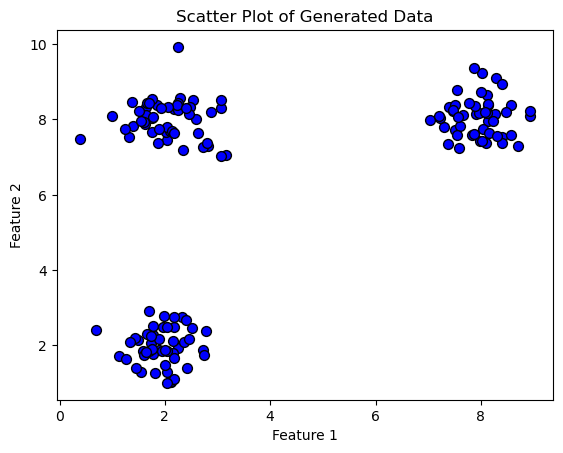

In [4]:
# Scatter plot of the data before K-means clustering
plt.scatter(df['Feature 1'], df['Feature 2'], c='blue', marker='o', edgecolor='k', s=50)
plt.title('Scatter Plot of Generated Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [5]:
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [6]:
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances to the closest cluster center

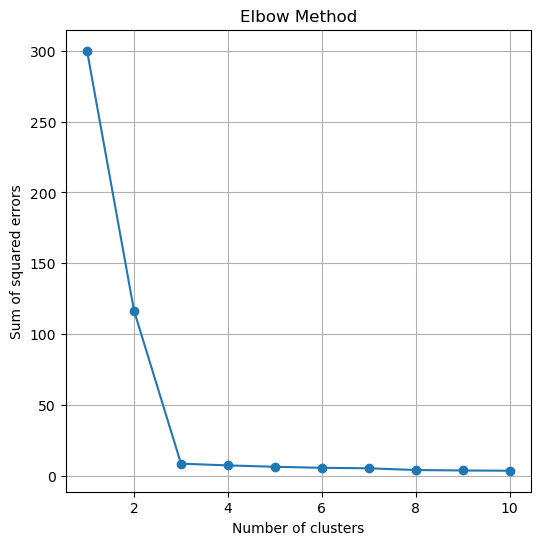

In [7]:
plt.figure(figsize=(6, 6))
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared errors')
plt.grid(True)
plt.show()

In [8]:
# Function to find the elbow point
def find_elbow_point(sse, k_range):
    # Normalize the SSE to a 0-1 scale
    sse = np.array(sse)
    sse_normalized = (sse - sse.min()) / (sse.max() - sse.min())

    # Normalize the k values to a 0-1 scale
    k = np.array(k_range)
    k_normalized = (k - k.min()) / (k.max() - k.min())

    # Compute the distances from the line connecting the first and last points
    distances = []
    for i in range(len(k_normalized)):
        p1 = np.array([k_normalized[0], sse_normalized[0]])
        p2 = np.array([k_normalized[-1], sse_normalized[-1]])
        p = np.array([k_normalized[i], sse_normalized[i]])
        dist = np.abs(np.cross(p2-p1, p1-p)) / np.linalg.norm(p2-p1)
        distances.append(dist)
    # Find the index of the maximum curvature
    elbow_idx = np.argmax(distances)
    return k_range[elbow_idx], distances, k_normalized, sse_normalized
    
# Determine the optimal number of clusters using the elbow method
optimal_k, distances, k_normalized, sse_normalized = find_elbow_point(sse, k_range)
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


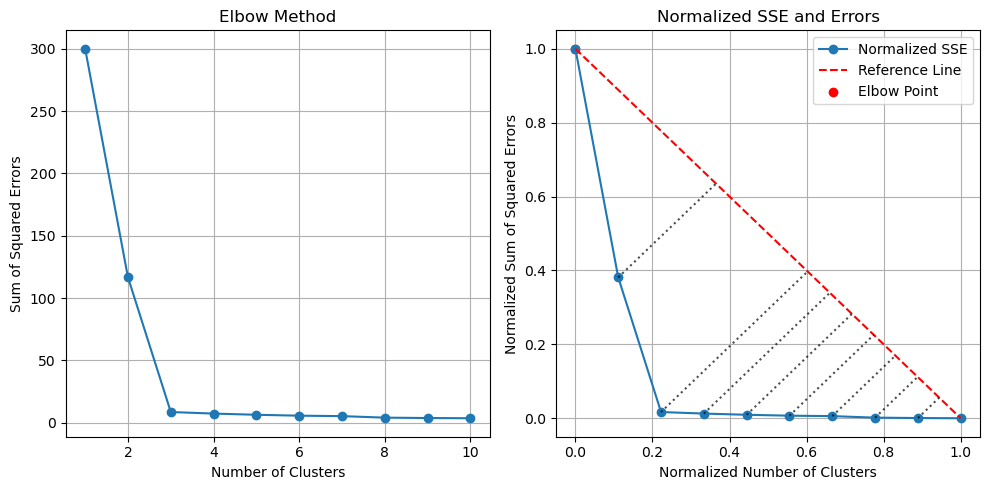

In [9]:
plt.figure(figsize=(10, 5))

# Plotting the first subplot (Elbow Method)
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squared Errors')
plt.grid(True)

# Plotting the second subplot (Normalized SSE and Distances)
plt.subplot(1, 2, 2)
plt.plot(k_normalized, sse_normalized, marker='o', label='Normalized SSE')
plt.plot([0, 1], [sse_normalized[0], sse_normalized[-1]], 'r--', label='Reference Line')

# Calculating and plotting lines to extend to the reference line
for i in range(len(k_normalized)):
    p1 = np.array([0, sse_normalized[0]])  # Start of the reference line
    p2 = np.array([1, sse_normalized[-1]])  # End of the reference line
    p = np.array([k_normalized[i], sse_normalized[i]])
    
    # Vector between p1 and p2
    vec_p1p2 = p2 - p1
    
    # Vector between p1 and p
    vec_p1p = p - p1
    
    # Project vec_p1p onto vec_p1p2
    scalar_proj = np.dot(vec_p1p, vec_p1p2) / np.dot(vec_p1p2, vec_p1p2)
    projected_point = p1 + scalar_proj * vec_p1p2
    
    plt.plot([k_normalized[i], projected_point[0]], [sse_normalized[i], projected_point[1]], 'k:', alpha=0.7)

# Highlighting the elbow point
elbow_index = np.argmax(sse_normalized)
plt.scatter(k_normalized[elbow_index], sse_normalized[elbow_index], color='red', label='Elbow Point')

plt.title('Normalized SSE and Errors')
plt.xlabel('Normalized Number of Clusters')
plt.ylabel('Normalized Sum of Squared Errors')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

In [10]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_scaled)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

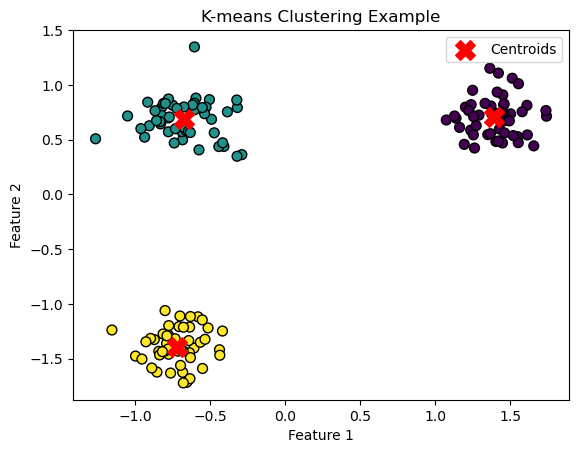

In [12]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('K-means Clustering Example')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()